# Premier  League EDA

important librieries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('Player Stats.csv')
data.head()

,Player,Club,Goals,Penalties_Scored,Headed_Goals,Assists,Passes,Through_Balls,Shots,Shots_on_Target,Interceptions,Blocks,Clean Sheets,Position,Apperence
0,Dan Burn,Newcastle United,1,0,1,0,1438,0,21,4,32,16,NaN,DF,38
1,Paul Onuachu,Southampton,0,0,0,0,91,0,11,5,0,1,NaN,FW,11
2,Harry Souttar,Leicester City,0,0,0,1,548,1,8,2,12,12,NaN,DF,12
3,Wout Weghorst,Manchester United,0,0,0,1,207,4,14,5,7,2,NaN,FW,17
4,Illan Meslier,Leeds United,0,0,0,0,842,0,1,1,1,0,5.0,GK,34


In [3]:
data.describe()

,Goals,Penalties_Scored,Headed_Goals,Assists,Passes,Through_Balls,Shots,Shots_on_Target,Interceptions,Blocks,Clean Sheets,Apperence
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,28.000000,467.000000
mean,2.211991,0.158458,0.353319,1.518201,726.608137,2.582441,20.293362,7.083512,14.464668,5.745182,5.857143,23.595289
std,3.834565,0.715065,0.924978,2.249747,567.297625,4.181909,22.431049,9.468917,13.673395,7.724422,4.828268,9.843901
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,263.500000,0.000000,5.000000,1.000000,4.000000,1.000000,1.000000,16.000000
50%,1.000000,0.000000,0.000000,1.000000,603.000000,1.000000,12.000000,3.000000,10.000000,3.000000,6.000000,25.000000
75%,3.000000,0.000000,0.000000,2.000000,1018.500000,3.000000,28.000000,9.000000,22.000000,8.000000,9.500000,32.000000
max,36.000000,7.000000,10.000000,16.000000,3208.000000,35.000000,130.000000,63.000000,63.000000,78.000000,14.000000,38.000000


as shown above maximum scored goal was ``36`` goal and maximum assists was ``16`` assist for this season 

## Top Scoerer and Assistant 

In [4]:
top_scoerer = data.loc[data['Goals'].argmax()]
top_assistant = data.loc[data['Assists'].argmax()]
print('Top scoerer for this season was :  {} from club : {}'.format(top_scoerer.Player,top_scoerer.Club))
print('Top assistant for this season was :  {} from club : {} '.format(top_assistant.Player,top_assistant.Club))

Top scoerer for this season was :  Erling Haaland from club : Manchester City
Top assistant for this season was :  Kevin De Bruyne from club : Manchester City 


###### looks like Man City was dominant everything !

## Team stats

In [5]:
team_data = data.groupby('Club')

In [6]:
teams = list(data['Club'].unique())
teamGoals = [team_data.get_group(team).Goals.sum() for team in teams]
teamPasses = [team_data.get_group(team).Passes.sum() for team in teams]

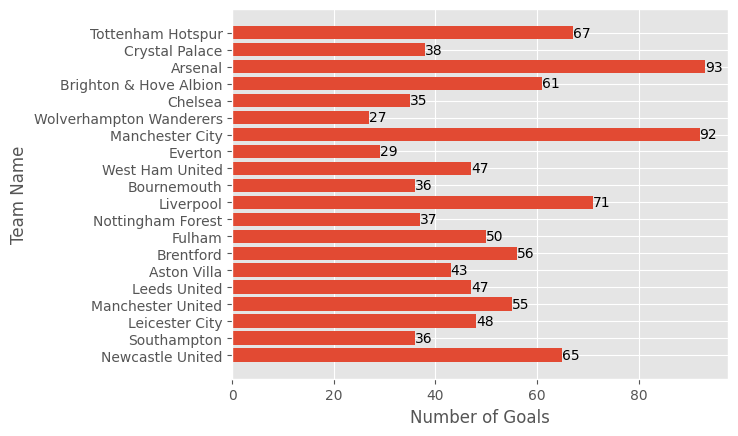

In [7]:
ax0=plt.barh(teams,teamGoals)
plt.bar_label(ax0,teamGoals)
plt.xlabel('Number of Goals')
plt.ylabel('Team Name')
plt.show()

We can see that Wolves and Everton need to enhance quality of their attackers also there is a big gap between Arsenal & Man city and the rest of the teams.

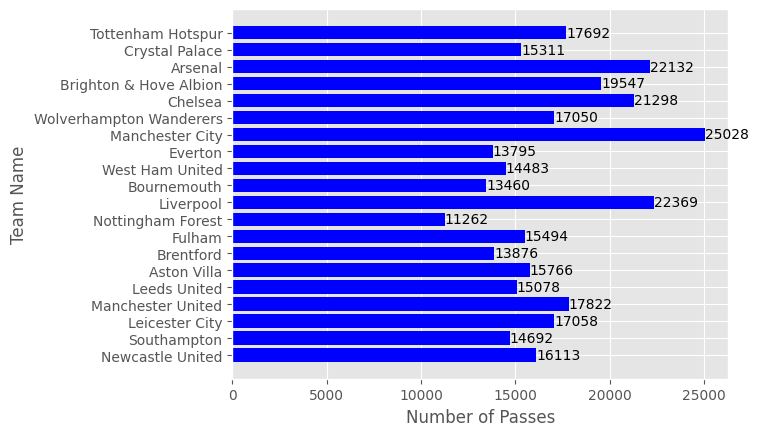

In [8]:
ax0=plt.barh(teams,teamPasses,color='blue')
plt.bar_label(ax0,teamPasses)
plt.xlabel('Number of Passes')
plt.ylabel('Team Name')
plt.show()

##### wooohhh , Man city is a beast!  well done pep !

In [9]:
teamshots =  [team_data.get_group(team).Shots.sum() for team in teams]
teamshotsTarget =  [team_data.get_group(team).Shots_on_Target.sum() for team in teams]
effectRatio = map(int,np.divide(teamshotsTarget,teamshots)*100)
print('Effective shots for every team : \n----------------------------')
for team,ratio in zip(teams,effectRatio):
    print(team,':',ratio,'%')

Effective shots for every team : 
----------------------------
Newcastle United : 35 %
Southampton : 34 %
Leicester City : 36 %
Manchester United : 36 %
Leeds United : 31 %
Aston Villa : 33 %
Brentford : 39 %
Fulham : 35 %
Nottingham Forest : 32 %
Liverpool : 35 %
Bournemouth : 36 %
West Ham United : 31 %
Everton : 33 %
Manchester City : 36 %
Wolverhampton Wanderers : 30 %
Chelsea : 31 %
Brighton & Hove Albion : 37 %
Arsenal : 35 %
Crystal Palace : 31 %
Tottenham Hotspur : 38 %


##### it's a little bit surpise for me too to see Brentford with the max effective shots! but isn't it more interesting to see all teams have ratio less than ``40``%? They could use more training on shooting.

## Postion Stats

In [10]:
posistionData = data.groupby('Position')
position = list(data['Position'].unique()[data['Position'].unique() != 'GK'])

In [11]:
posGoals = [posistionData.get_group(pos).Goals.sum() for pos in position]

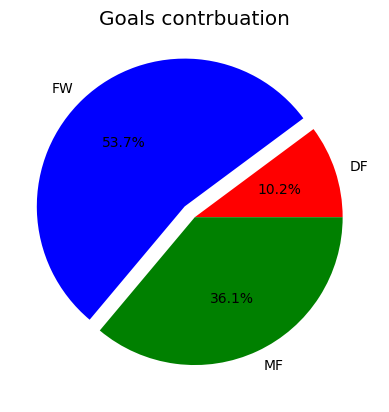

In [12]:
plt.pie(posGoals,labels=position,autopct='%1.1f%%',colors=['red','blue','green'],explode=[0,0.1,0])
plt.title('Goals contrbuation')
plt.show()

Not surprusing to see most of the goals come from Strikers.

In [13]:
posInterceptions = [posistionData.get_group(pos).Interceptions.sum() for pos in position]

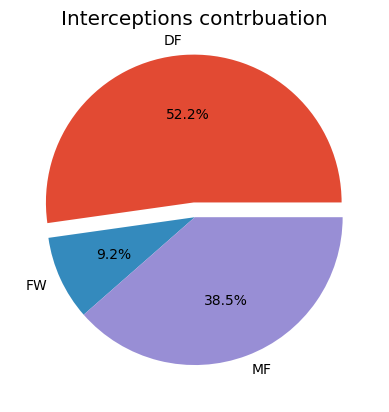

In [14]:
plt.pie(posInterceptions,labels=position,autopct='%1.1f%%',explode=[0.1,0,0])
plt.title('Interceptions contrbuation')
plt.show()

Again not surprusing to see most of the interceptions  come from Defenders.
but look again at both pies , can you see that strikers and defenders swap roles but midfielders stay still! 
almost same contribution in attacking and defending! 

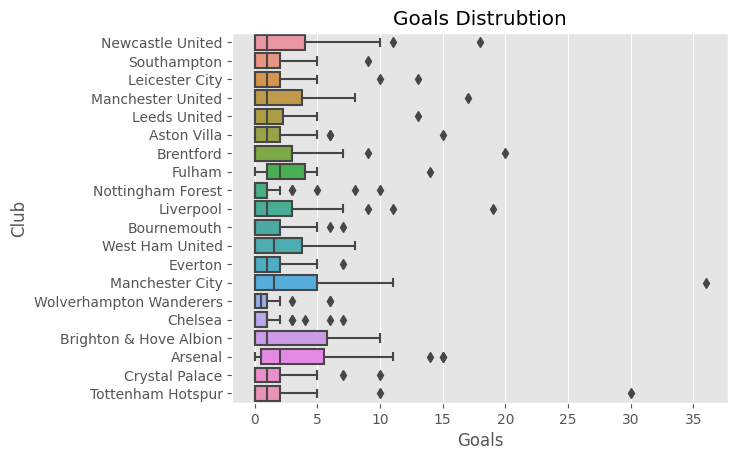

In [15]:
sns.boxplot(data = data , x = 'Goals',y = 'Club')
plt.title('Goals Distrubtion')
plt.show()

average goals for each player is approximately 2 goals , we saw that previously in describe method

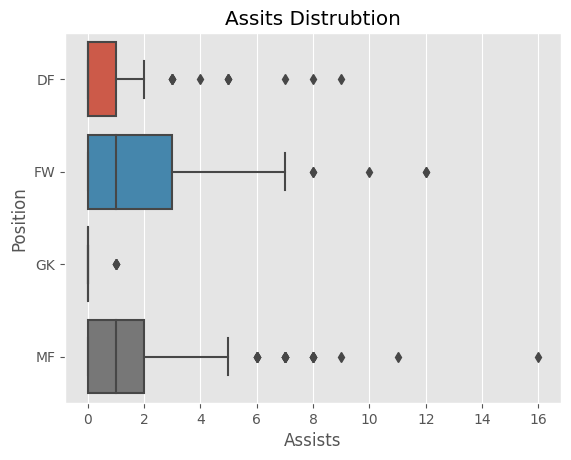

In [16]:
sns.boxplot(data = data , x = 'Assists',y = 'Position')
plt.title('Assits Distrubtion')
plt.show()

wow! ``GK`` Assisted goals ?  Let's see who are they !

In [17]:
GkwithAssist = (data['Position']=='GK') & (data['Assists']!=0)
names = list(data.loc[GkwithAssist].Player)
clubs = list(data.loc[GkwithAssist].Club)
AssitsNum = list(data.loc[GkwithAssist].Assists)
for name,club,assist in zip(names,clubs,AssitsNum):
    print(name,'from',club,'with number of assists =',assist)

Alisson from Liverpool with number of assists = 1
Ederson from Manchester City with number of assists = 1
Jason Steele from Brighton & Hove Albion with number of assists = 1
Jordan Pickford from Everton with number of assists = 1


We have got 4 ``GK`` with one Assist!

# Author
### Amir Tarek
##### mail : amir.tarek11@gmail.com
##### data : premier league player stats for season 2022\2023